This notebook will download the latests data povided by the Johns Hopkins University Center for Systems Science and Engineering from their GitHub repository.

In [1]:
DATA_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

Pandas is a powerful and easy to use data manipulation library for python.

In [2]:
import pandas as pd

Rule #1: Always look at your data. Here, data is aggregated at the country or region level for some countries and at the province or state level for others.

In [3]:
data = pd.read_csv(DATA_URL)
data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,7,7,7,7,7,7,7
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,301,387,387,502,589,690,745,820,1054,1054
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,235,249,265,290,329,407,424,482,532,571
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,32,39,39,53,62,71,77,78,80,84
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,669,818,1029,1219,1405,1617,1791,2032,2032,2182


We no not need the latitude and longitude data, so we drop the Lat and Long columns.

In [4]:
data = data.drop(columns=["Lat", "Long"])
data.head(3)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847


Countries that had province-level data will appear multiple times. Sum the values to get one row per country.

In [5]:
data = data.groupby("Country/Region").sum()
data.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
Albania,0,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
Algeria,0,0,0,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
Andorra,0,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
Angola,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,3,3,3,7,7,7,7,7,7,7
Argentina,0,0,0,0,0,0,0,0,0,0,...,301,387,387,502,589,690,745,820,1054,1054
Armenia,0,0,0,0,0,0,0,0,0,0,...,235,249,265,290,329,407,424,482,532,571
Australia,0,0,0,0,4,5,5,6,9,9,...,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862


The groupby operation turned the country names into an index, now we only need to convert the column titles into proper dates.

In [6]:
data.columns = [pd.to_datetime(column).date() for column in data.columns]
data.head(3)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
Albania,0,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
Algeria,0,0,0,0,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847


Adding a new column for each new date is a somewhat strange decision that the authors of this dataset made. In general, the number of columns should be constant and rows should be added as the dataset grows. Let's transpose the dataset and make sure it is ordered by date.

In [7]:
data = data.T
data = data.sort_index()
data.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
2020-03-28,110,197,454,308,5,7,690,407,3640,8271,...,356,468,17312,274,104,119,174,98,28,7
2020-03-29,120,212,511,334,7,7,745,424,3984,8788,...,475,570,19780,304,144,119,188,109,29,7
2020-03-30,170,223,584,370,7,7,820,482,4361,9618,...,548,611,22453,310,149,135,203,116,35,7
2020-03-31,174,243,716,376,7,7,1054,532,4559,10180,...,645,664,25481,338,172,135,212,119,35,8
2020-04-01,237,259,847,390,8,7,1054,571,4862,10711,...,794,814,29865,338,181,143,218,134,36,8


Plotting requires very little setup in Jupyter. The matplotlib magic function takes care of everything.

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Now we can use Pandas' built-in plot functions to visualize the data. A simple plot() without any parameters works, but we obviously need to reduce the amount of data in the plot. The legend is many times larger than the plot and individual countries are barely recognizable.

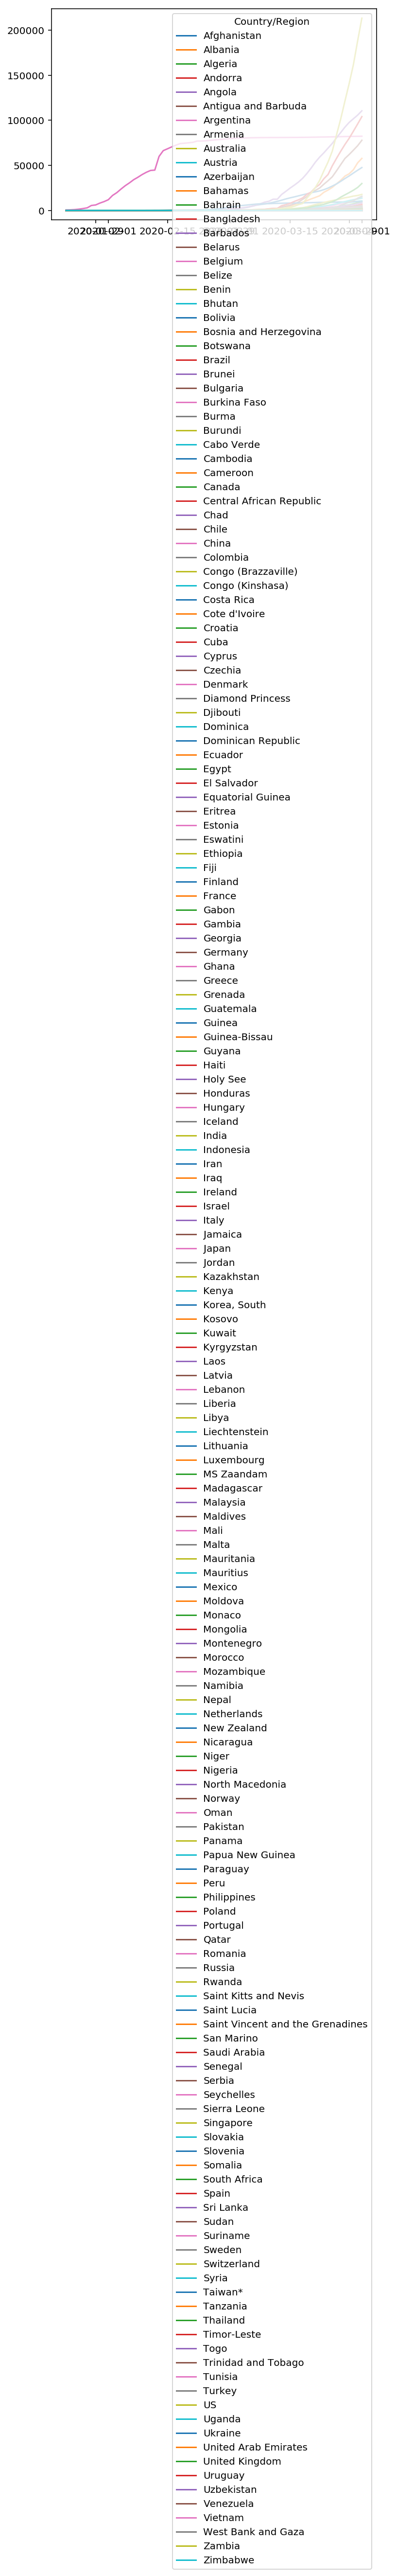

In [9]:
data.plot()

For a single country, plot() works well enough, though there is something wrong with the labels on the x axis. They are not evenly spaced and overlapping.

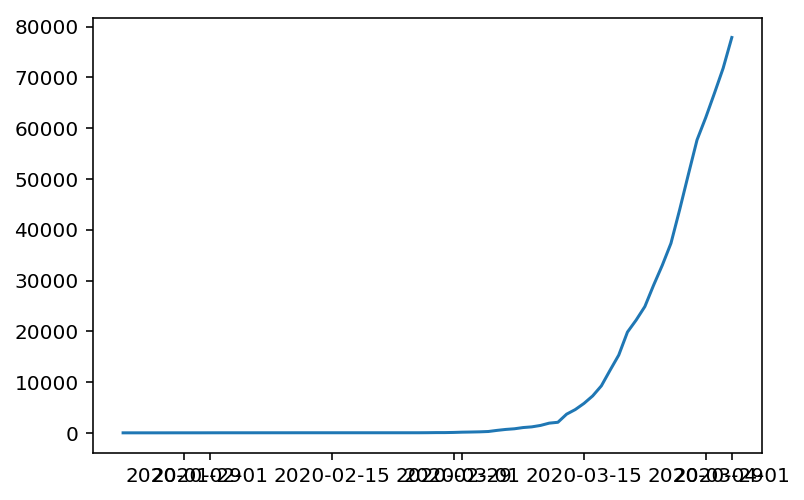

In [10]:
data["Germany"].plot()

To get more control over the layout of the plot, the matplotlib package provides the necessary classes and functions. We need a date formatter that provides a shorter date format and a locator to evenly space the ticks on the x axis.

In [11]:
import matplotlib

formatter = matplotlib.dates.DateFormatter('%m/%d')
locator = matplotlib.ticker.AutoLocator() 

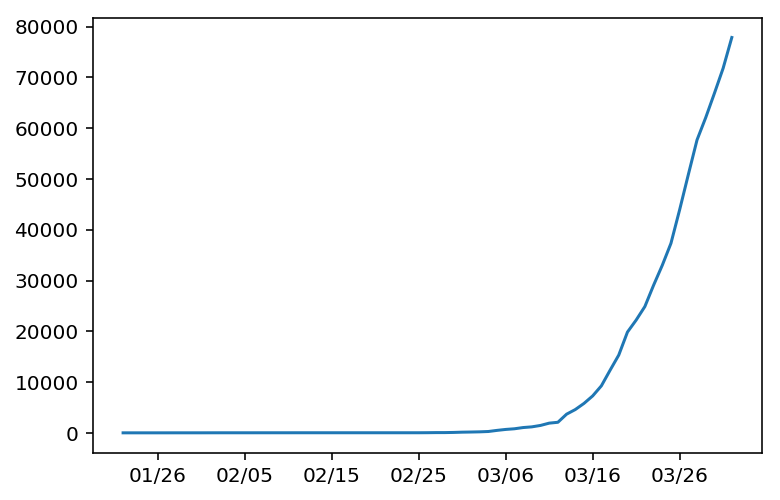

In [12]:
ax = data["Germany"].plot()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

Plotting multiple countries will automatically add a legend.

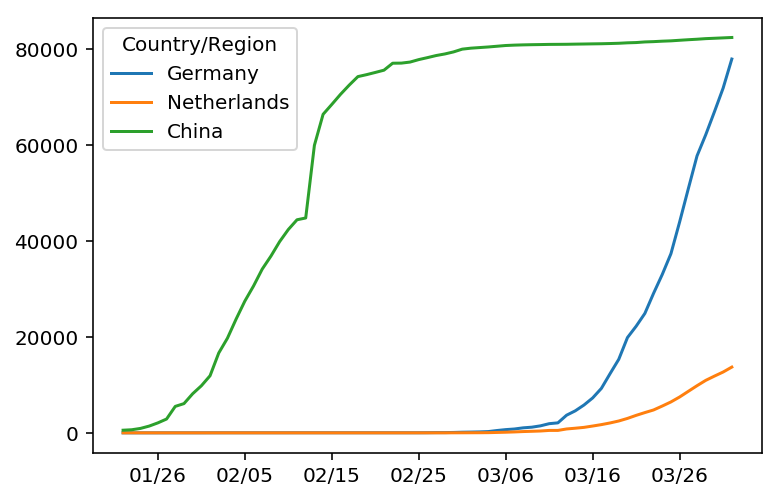

In [13]:
ax = data[["Germany", "Netherlands", "China"]].plot()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

Add labels and a title.

In [14]:
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed cases")
ax.figure.suptitle("Covid data overview")

Text(0.5, 0.98, 'Covid data overview')

Save the result. Done!

In [15]:
ax.figure.savefig("plot.pdf")